## Aim - SMS Spam Classifier for Effective Message Filtering

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import nltk
import string
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [35]:
import os
os.chdir('C:\\Users\\zainu\\Downloads\\SMS_Spam_Classifier')

### Load the dataset

In [36]:
# Try different encodings if one doesn't work
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'utf-16']

for encoding in encodings:
    try:
        SMS_raw = pd.read_csv('spam.csv', encoding=encoding)
        break  # If no error occurs, exit the loop
    except UnicodeDecodeError:
        continue  # If there's an error, try the next encoding

In [37]:
sms = SMS_raw.copy()

In [38]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
sms.shape

(5572, 5)

**In our dataset there are 5572 records and 5 variables.**

### We will follow these Steps in our SMS spam classifier project

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Model Evaluation
6. Improvements
7. Creating Website

In [40]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Drop Unnamed Columns**

In [41]:
sms_1 = sms.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

**Rename v1 and v2 Columns**

In [42]:
sms_1 = sms_1.rename(columns = {'v1':'outcome', 'v2': 'text'})

In [43]:
sms_1.head()

,outcome,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
sms_1['outcome'].unique()

array(['ham', 'spam'], dtype=object)

## Label Encoding

In [45]:
sms_2 = sms_1.copy()

In [46]:
le = LabelEncoder()

In [47]:
# Encode spam as 1 and ham as 0
sms_2['outcome'] = le.fit_transform(sms_1['outcome'])

In [48]:
sms_2.head()

,outcome,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Cheking for null/missing values

In [49]:
sms_2.isnull().sum()

outcome    0
text       0
dtype: int64

**We don't have any missing values in our dataset.**

In [50]:
sms_2.duplicated().sum()

403

In [51]:
# remove duplicates
sms_2 = sms_2.drop_duplicates(keep = 'first')

In [52]:
sms_2.duplicated().sum()

0

In [53]:
sms_2.shape

(5169, 2)

## 2. Exploratory Data Analysis

In [54]:
sms_2['outcome'].value_counts()

0    4516
1     653
Name: outcome, dtype: int64

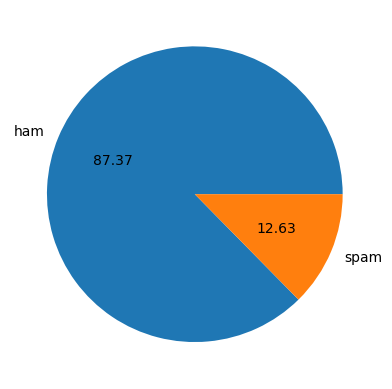

In [55]:
plt.pie(sms_2['outcome'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

**Only 12.6% of our data consists of spam, indicating that our dataset is imbalanced.**

In [56]:
sms_3 = sms_2.copy()

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zainu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Create a new variable named "num_characters" to store the length of characters.**

In [58]:
sms_3['num_characters'] = sms_3['text'].apply(len)

In [59]:
sms_3.head()

,outcome,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Create a new variable named "num_words" to store the length of wrods from text variable.**

In [60]:
# number of words
sms_3['num_words'] = sms_3['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [61]:
sms_3.head()

,outcome,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


**Create a new variable named "num_sentences" to store the length of sentence.**

In [62]:
# number of senetence
sms_3['num_sentences'] = sms_3['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [63]:
sms_3.head()

,outcome,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
sms_3[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [65]:
# Statistical measures for ham messages
sms_3[sms_3['outcome'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [66]:
# Statistical measures for spam messages
sms_3[sms_3['outcome'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


**Spam messages are slightly larger than normal (ham) messages.**

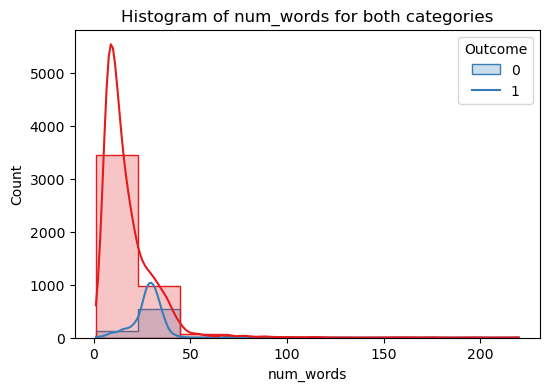

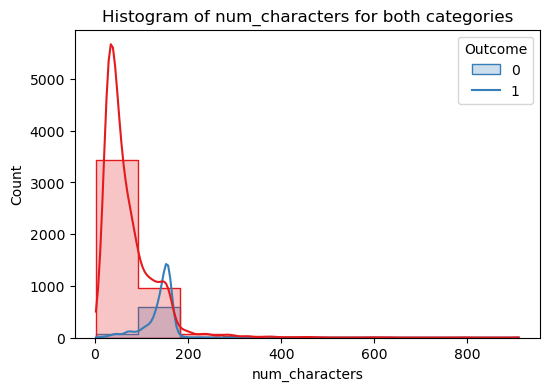

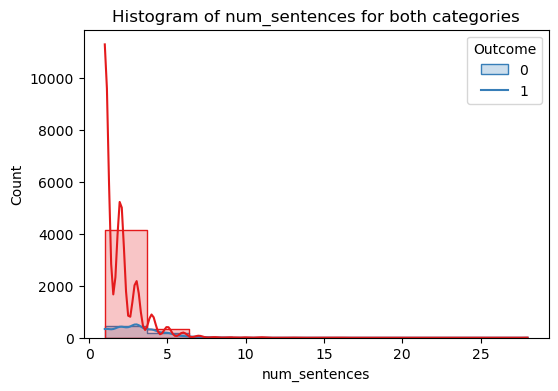

In [113]:
# Create histograms for each numerical column
numeric_cols = ['num_words', 'num_characters', 'num_sentences']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=sms_3, x=col, hue='outcome', element='step', kde=True, bins=10, palette='Set1')
    plt.title(f'Histogram of {col} for both categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Outcome', labels=['0', '1'])
    plt.show()

**From the above histogram we can see, Spam messages contain more words and characters compared to ham messages.**

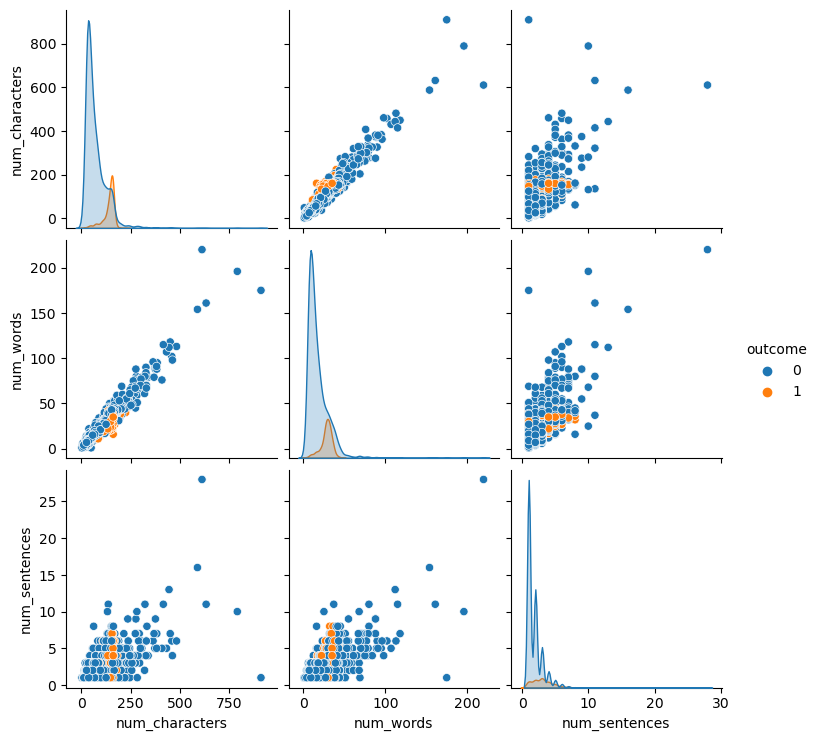

In [68]:
sns.pairplot(sms_3, hue = 'outcome')

**There is a linear relationship between num_words and num_characters**

## 3. Data Preprocessing

We will follow this series of steps for data processing.

- **Lower case**
- **Tokenization**
- **Removing Special characters**
- **Removing stop words and punctuations**
- **Stemming**

In [69]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zainu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
ps = PorterStemmer()
ps.stem('dancing', 'danced')

'danc'

In [73]:
# create a function that does the series of task

def transform_text(text):
    # lower case
    text = text.lower()
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    # Removing Special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuations
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Stemming
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [74]:
transform_text("I loved the Youtube lectures on machine learning how about you?")

'love youtub lectur machin learn'

**Create a new variable named "transformed_text" using transform_text function**

In [75]:
sms_3['transformed_text'] = sms_3['text'].apply(transform_text)

In [76]:
sms_3.head()

,outcome,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### We want to check which word used most of the time so we can use WordCloud

In [77]:
from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

## For Spam

In [78]:
spam_wc = wc.generate(sms_3[sms_3['outcome'] == 1]['transformed_text'].str.cat(sep = " "))

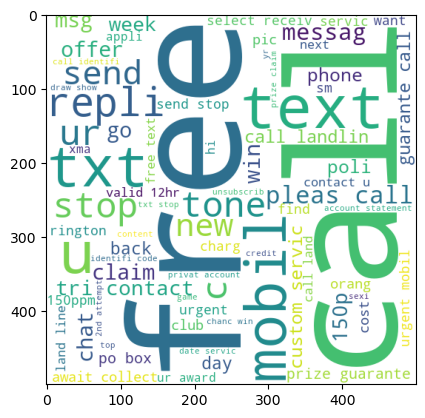

In [79]:
plt.imshow(spam_wc)

## For ham

In [80]:
ham_wc = wc.generate(sms_3[sms_3['outcome'] == 0]['transformed_text'].str.cat(sep = " "))

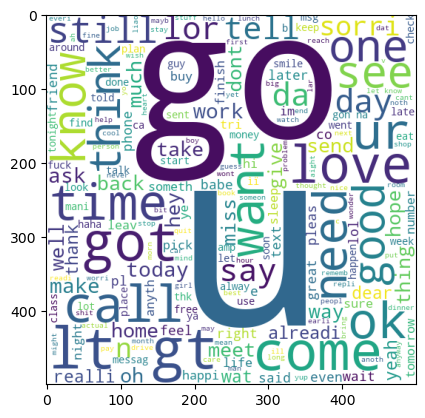

In [81]:
plt.imshow(ham_wc)

**Find Top 30 keywords for spam and ham.**

In [83]:
spam_corpus = []
for msg in sms_3[sms_3['outcome'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [84]:
len(spam_corpus)

9939

In [85]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\zainu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


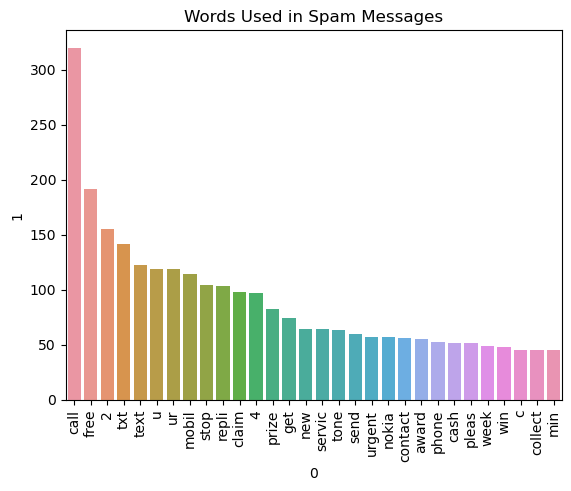

In [136]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.title("Words Used in Spam Messages")
plt.xticks(rotation = 'vertical')
plt.show()

In [87]:
ham_corpus = []
for msg in sms_3[sms_3['outcome'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\zainu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


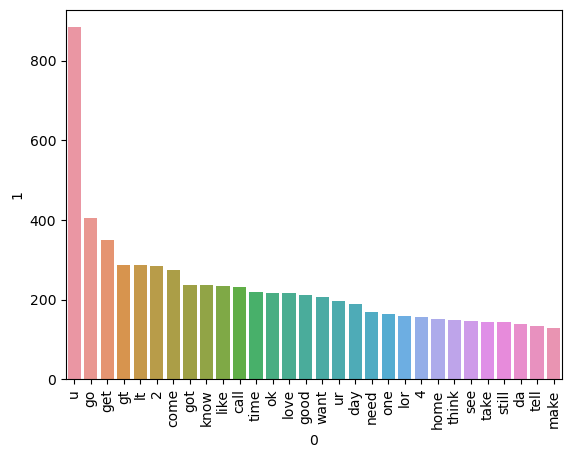

In [88]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

**Naive Bayes is good for textual data**

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

### X and y array

In [90]:
X = cv.fit_transform(sms_3['transformed_text']).toarray()

In [91]:
X.shape

(5169, 6708)

In [92]:
y = sms_3.outcome.values

In [93]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Train Test Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [125]:
gnb = GaussianNB()

In [126]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

### Accuracy Score

In [127]:
print(accuracy_score(y_test, y_pred1))

0.8800773694390716


### Precision

In [128]:
print(precision_score(y_test, y_pred1))

0.5315315315315315


### Confusion matrix

In [129]:
print(confusion_matrix(y_test, y_pred1))

[[792 104]
 [ 20 118]]


In [130]:
mnb = MultinomialNB()

In [131]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

In [132]:
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [133]:
bnb = BernoulliNB()

In [134]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

In [135]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Experimenting with various machine learning algorithms to identify the most effective one for our case.

In [104]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [105]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [106]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [107]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9284332688588007, 0.7580645161290323)

In [108]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [109]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
10,xgb,0.974855,0.974576
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


#### Among all the machine learning algorithms, we found that Random Forest performs exceptionally well on our dataset.

In [110]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

### Conclusion

- After conducting exploratory data analysis (EDA), we observed that the length of spam messages is higher than that of normal messages.
- Additionally, in spam messages, words such as "You", "Call" and "text" are predominantly used.
- Random Forest performed exceptionally well on our dataset, achieving an accuracy of 97%.

# ---------------------------------------------------Thank you-----------------------------------------------